In [1]:
#### gcloud login
import os
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"
%cd /content/gdrive/My Drive/Kaggle



#### check for gpu
import tensorflow as tf
import numpy as np
from tensorflow.python.client import device_lib


def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    print(local_device_protos)

get_available_gpus()
print("Tensorflow version " + tf.__version__)

Mounted at /content/drive/
[Errno 2] No such file or directory: '/content/gdrive/My Drive/Kaggle'
/content
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 583078644972991746
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16743058968545981869
physical_device_desc: "device: XLA_CPU device"
]
Tensorflow version 2.3.0


In [2]:
###get data
%cd /content/drive/My Drive/Kaggle
%mkdir house_prices
%cd house_prices

/content/drive/My Drive/Kaggle
mkdir: cannot create directory ‘house_prices’: File exists
/content/drive/My Drive/Kaggle/house_prices


In [3]:
!pip install --upgrade --force-reinstall --no-deps kaggle
!kaggle competitions download -c house-prices-advanced-regression-techniques

Processing /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674/kaggle-1.5.6-cp36-none-any.whl
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6
house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip -q house-prices-advanced-regression-techniques.zip

replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
root = os.getcwd()

trainFile = '/train.csv'
testFile = '/test.csv'

trainData = pd.read_csv(root + trainFile)
testData = pd.read_csv(root + testFile)

In [6]:
### take a look at the data
trainData.head(10)
### columns : to select relevant feature

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

---------Id-----------------


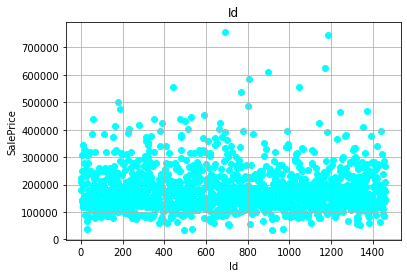

--------------------------
---------MSSubClass-----------------


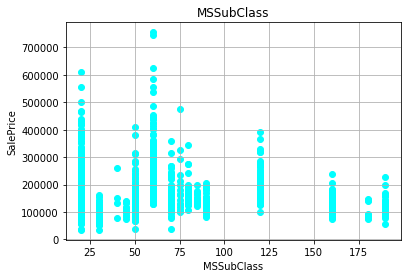

--------------------------
---------MSZoning-----------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------
---------LotFrontage-----------------


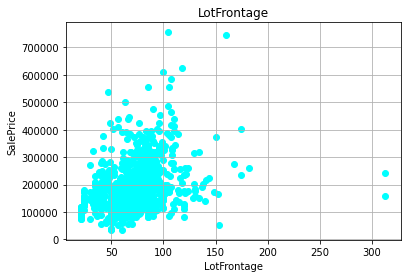

--------------------------
---------LotArea-----------------


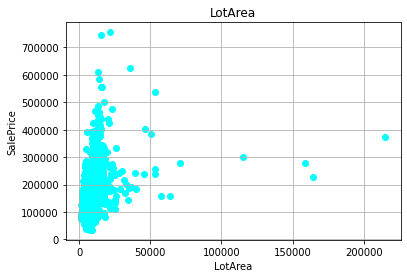

--------------------------
---------Street-----------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------
---------Alley-----------------
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
--------------------------
---------LotShape-----------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------
---------LandContour-----------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------
---------Utilities-----------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------
---------LotConfig-----------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------------
---------LandSlope-----------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
--------------------------
---------Neighborhood----------

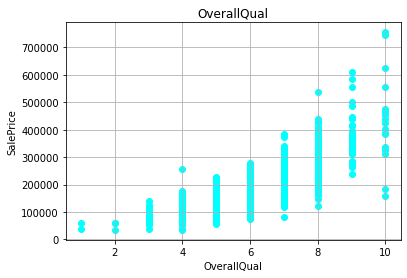

--------------------------
---------OverallCond-----------------


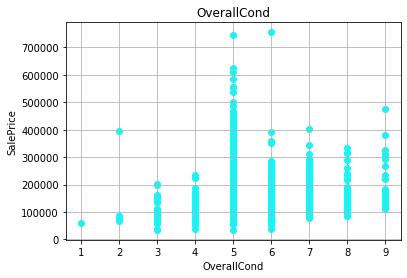

--------------------------
---------YearBuilt-----------------


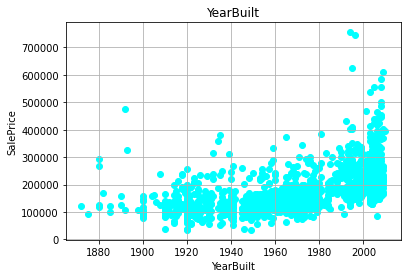

--------------------------
---------YearRemodAdd-----------------


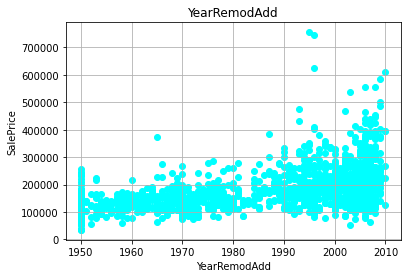

--------------------------
---------RoofStyle-----------------
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
--------------------------
---------RoofMatl-----------------
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Roll          1
ClyTile       1
Membran       1
Name: RoofMatl, dtype: int64
--------------------------
---------Exterior1st-----------------
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
--------------------------
---------Exterior2nd-----------------
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn   

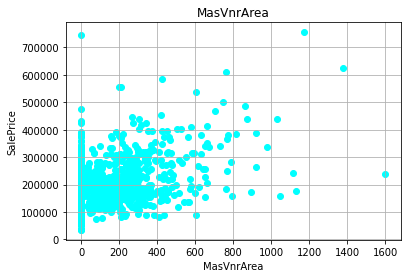

--------------------------
---------ExterQual-----------------
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
--------------------------
---------ExterCond-----------------
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
--------------------------
---------Foundation-----------------
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
--------------------------
---------BsmtQual-----------------
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64
--------------------------
---------BsmtCond-----------------
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64
--------------------------
---------BsmtExposure-----------------
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64
--------------------------
---------BsmtFinType1-----------------
Unf    430
GLQ    418
A

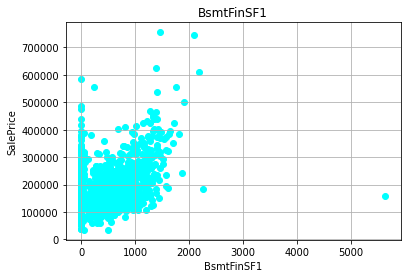

--------------------------
---------BsmtFinType2-----------------
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
--------------------------
---------BsmtFinSF2-----------------


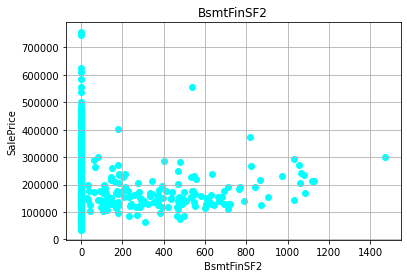

--------------------------
---------BsmtUnfSF-----------------


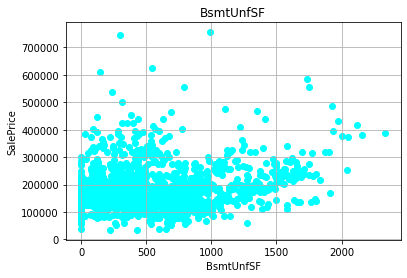

--------------------------
---------TotalBsmtSF-----------------


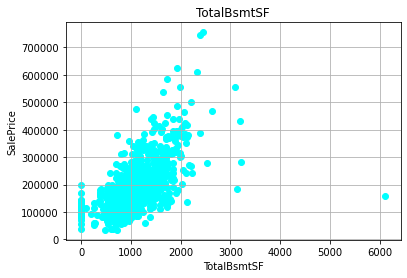

--------------------------
---------Heating-----------------
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
--------------------------
---------HeatingQC-----------------
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
--------------------------
---------CentralAir-----------------
Y    1365
N      95
Name: CentralAir, dtype: int64
--------------------------
---------Electrical-----------------
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64
--------------------------
---------1stFlrSF-----------------


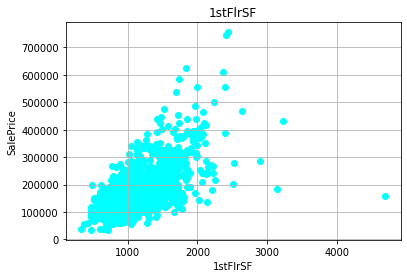

--------------------------
---------2ndFlrSF-----------------


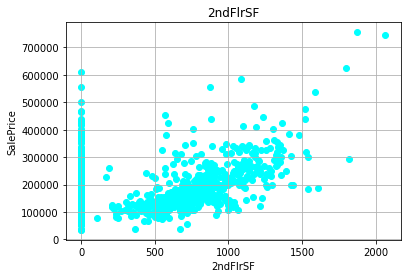

--------------------------
---------LowQualFinSF-----------------


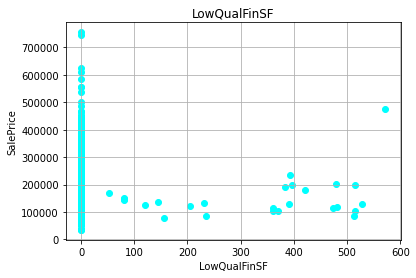

--------------------------
---------GrLivArea-----------------


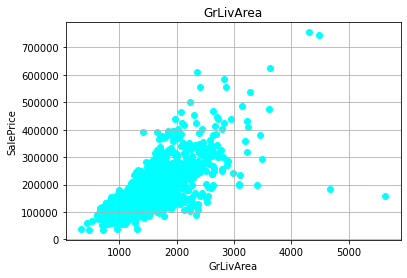

--------------------------
---------BsmtFullBath-----------------


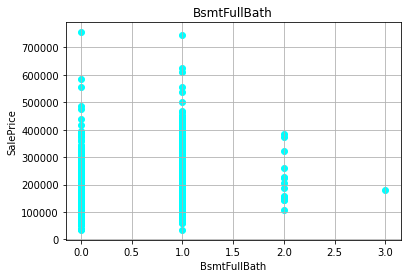

--------------------------
---------BsmtHalfBath-----------------


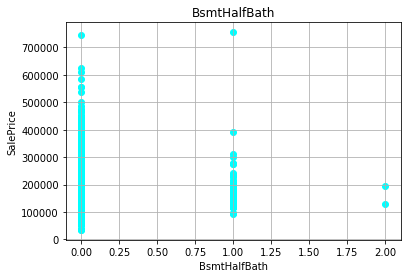

--------------------------
---------FullBath-----------------


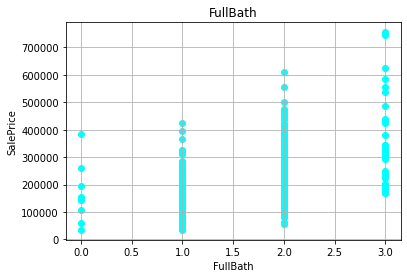

--------------------------
---------HalfBath-----------------


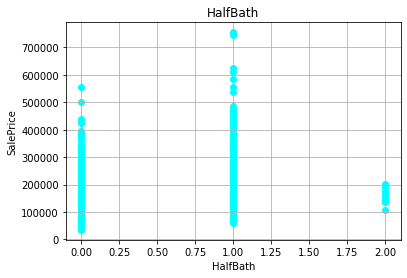

--------------------------
---------BedroomAbvGr-----------------


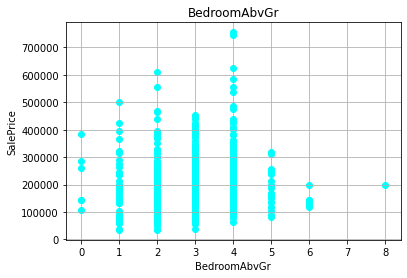

--------------------------
---------KitchenAbvGr-----------------


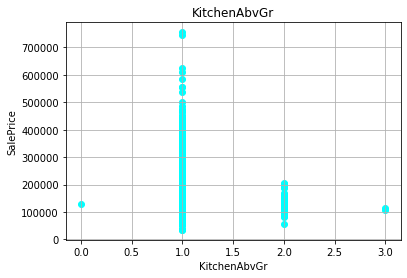

--------------------------
---------KitchenQual-----------------
TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
--------------------------
---------TotRmsAbvGrd-----------------


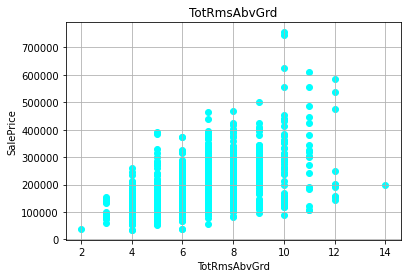

--------------------------
---------Functional-----------------
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
--------------------------
---------Fireplaces-----------------


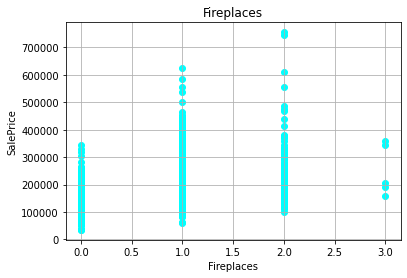

--------------------------
---------FireplaceQu-----------------
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
--------------------------
---------GarageType-----------------
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
--------------------------
---------GarageYrBlt-----------------


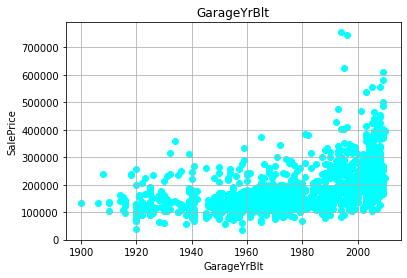

--------------------------
---------GarageFinish-----------------
Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64
--------------------------
---------GarageCars-----------------


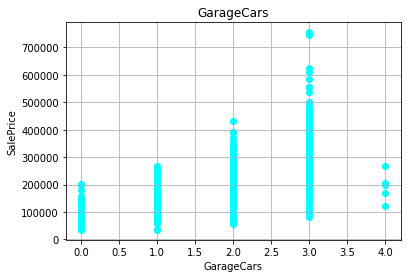

--------------------------
---------GarageArea-----------------


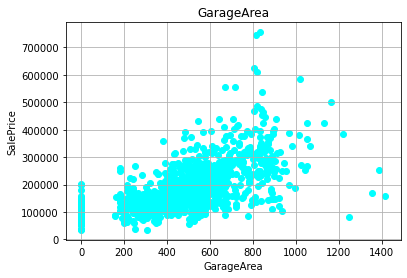

--------------------------
---------GarageQual-----------------
TA     1311
NaN      81
Fa       48
Gd       14
Po        3
Ex        3
Name: GarageQual, dtype: int64
--------------------------
---------GarageCond-----------------
TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64
--------------------------
---------PavedDrive-----------------
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
--------------------------
---------WoodDeckSF-----------------


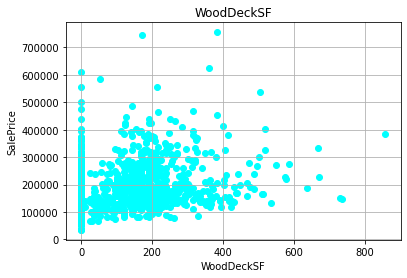

--------------------------
---------OpenPorchSF-----------------


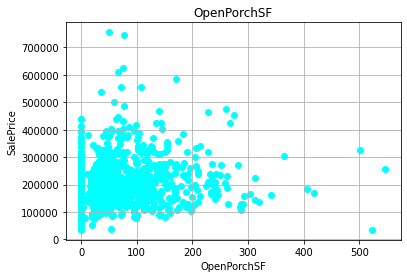

--------------------------
---------EnclosedPorch-----------------


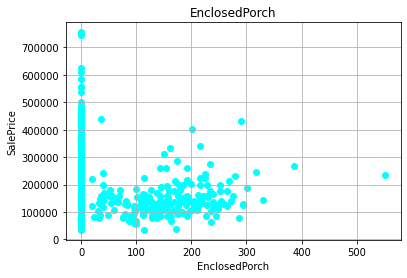

--------------------------
---------3SsnPorch-----------------


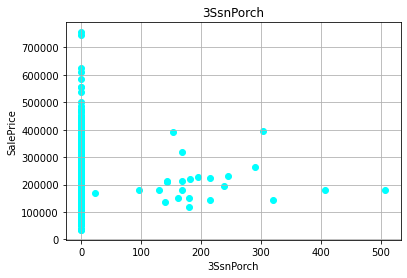

--------------------------
---------ScreenPorch-----------------


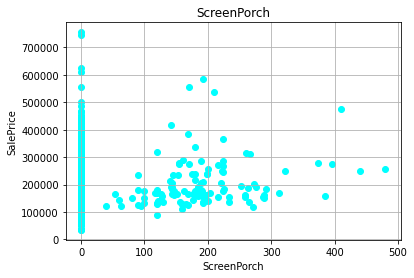

--------------------------
---------PoolArea-----------------


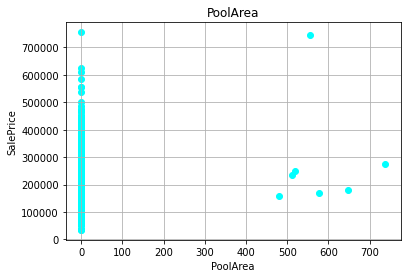

--------------------------
---------PoolQC-----------------
NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64
--------------------------
---------Fence-----------------
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
--------------------------
---------MiscFeature-----------------
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64
--------------------------
---------MiscVal-----------------


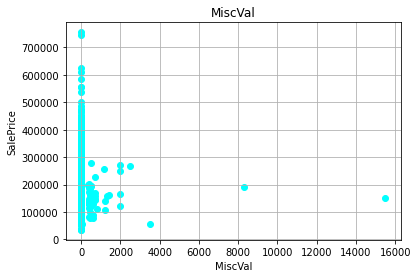

--------------------------
---------MoSold-----------------


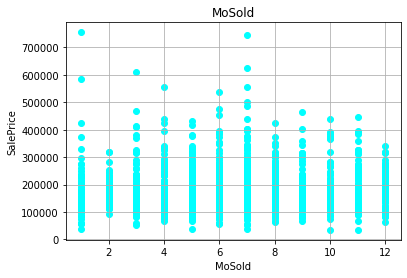

--------------------------
---------YrSold-----------------


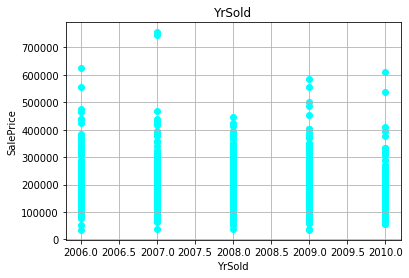

--------------------------
---------SaleType-----------------
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
--------------------------
---------SaleCondition-----------------
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
--------------------------
---------SalePrice-----------------


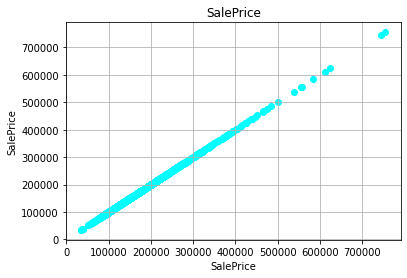

--------------------------


In [7]:
numerical_columns = list(trainData.select_dtypes(include=[np.number]).columns)

for feature in trainData.columns:
  print('---------' + feature + '-----------------')
  data = trainData[feature].value_counts(dropna=False)
  l = len(data)

  if feature in numerical_columns:
    plt.scatter(trainData[feature], trainData['SalePrice'], c = 'cyan')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.grid(True)
    plt.show()
  else:
    print(data)
  print('--------------------------')

#### we'll drop the following columns

to_drop = ['Id', 'Utilities', 'Alley', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', 'BsmtHalfBath', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition', \
             'LotArea']
to_encode = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', \
             'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', \
             'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', \
             'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'KitchenQual']


to_predict = ['SalePrice']
          



In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

meanTrain = SimpleImputer(missing_values=np.nan, strategy='mean')
meanTest = SimpleImputer(missing_values=np.nan, strategy='mean')
#remove the features
trainData.drop(to_drop,  inplace=True, axis='columns')
testData.drop(to_drop, inplace=True, axis='columns')


stdScalerColumns = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', \
                    'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', \
                    'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', \
                    'OpenPorchSF', 'MoSold', 'YrSold']
scaler = StandardScaler()

meanTrain.fit(trainData[stdScalerColumns])
trainData[stdScalerColumns] = scaler.fit_transform(meanTrain.transform(trainData[stdScalerColumns]))
meanTest.fit(testData[stdScalerColumns])
testData[stdScalerColumns] = scaler.transform(meanTest.transform(testData[stdScalerColumns]))


### encode features
trainData = pd.get_dummies(trainData, columns=to_encode)
testData =  pd.get_dummies(testData, columns=to_encode)

In [9]:
X_train , Y_train = trainData.loc[:, trainData.columns != 'SalePrice'], trainData['SalePrice']
Y_train = np.log2(Y_train)

In [10]:
print(X_train.shape)
print(Y_train.shape)
assert not np.any(np.isnan(X_train))

(1460, 214)
(1460,)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


### no need for batching
model = Sequential([
                 tf.keras.layers.Dense(512, input_dim=X_train.shape[1]),
                 tf.keras.layers.ReLU(),
                 tf.keras.layers.Dense(256),
                 tf.keras.layers.ReLU(),
                 tf.keras.layers.Dense(128),
                 tf.keras.layers.ReLU(),
                 tf.keras.layers.Dropout(0.2),
                 tf.keras.layers.Dense(64),
                 tf.keras.layers.ReLU(),
                 tf.keras.layers.Dropout(0.2),
                 tf.keras.layers.Dense(32),
                 tf.keras.layers.ReLU(),
                 tf.keras.layers.Dropout(0.2),
                 tf.keras.layers.Dense(16),             
                 tf.keras.layers.Dense(1, activation='linear')])

optim = tf.keras.optimizers.RMSprop()
model.compile(loss='mse', optimizer=optim)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               110080    
_________________________________________________________________
re_lu (ReLU)                 (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
re_lu_2 (ReLU)               (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [13]:
trainTensor = tf.data.Dataset.from_tensor_slices((X_train.values, Y_train.values))
train_dataset = trainTensor.shuffle(len(X_train)).batch(1)
hist = model.fit(train_dataset, epochs = 50)

Epoch 1/50
1460/1460 [==============================] - 5s 3ms/step - loss: 68.5812
Epoch 2/50
1460/1460 [==============================] - 5s 3ms/step - loss: 26.6087
Epoch 3/50
1460/1460 [==============================] - 5s 3ms/step - loss: 18.5948
Epoch 4/50
1460/1460 [==============================] - 5s 3ms/step - loss: 16.1420
Epoch 5/50
1460/1460 [==============================] - 5s 3ms/step - loss: 12.0794
Epoch 6/50
1460/1460 [==============================] - 5s 3ms/step - loss: 8.7627
Epoch 7/50
1460/1460 [==============================] - 5s 3ms/step - loss: 7.1382
Epoch 8/50
1460/1460 [==============================] - 5s 3ms/step - loss: 4.9803
Epoch 9/50
1460/1460 [==============================] - 5s 3ms/step - loss: 2.5701
Epoch 10/50
1460/1460 [==============================] - 5s 3ms/step - loss: 0.7077
Epoch 11/50
1460/1460 [==============================] - 5s 3ms/step - loss: 0.2070
Epoch 12/50
1460/1460 [==============================] - 5s 3ms/step - loss: 0.1

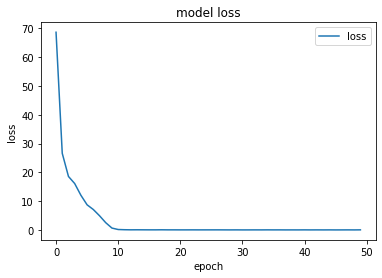

In [15]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()